In [15]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mobile_df = pd.read_csv("D:\cross-device-playground\sunshine\data\mobile-06142040.csv")

In [3]:
mobile_df.head()

,ID,DeviceName,Timestamp,Compass,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z
0,charlie,MI 5,636646019481097900,259.074677,-0.012075,0.013829,0.993512,-0.000336,0.001587,0.000366,12.423706,-2.479553,-47.503662
1,charlie,MI 5,636646019480876720,261.315735,-0.012075,0.016026,0.989854,-0.000946,-0.000870,0.000977,12.405396,-2.770996,-46.232605
2,charlie,MI 5,636646019480916330,261.315735,-0.010855,0.013587,0.993756,0.000885,-0.000259,-0.000854,12.423706,-2.479553,-47.503662
3,charlie,MI 5,636646019480782790,259.636047,-0.009392,0.014318,0.994245,0.000275,0.000351,0.002197,12.854004,-3.033447,-46.220398
4,charlie,MI 5,636646019480813870,259.636047,-0.011098,0.013829,0.993756,-0.002167,0.002808,0.000366,12.405396,-2.770996,-46.232605


In [4]:
mobile_df.sort_values(by=["Timestamp"], ascending=[True], inplace=True)
mobile_df["Timestamp"] = mobile_df["Timestamp"] / 10000000
mobile_df["Timestamp"] = mobile_df["Timestamp"] - mobile_df.iloc[0]["Timestamp"]

In [5]:
mobile_df.head()

,ID,DeviceName,Timestamp,Compass,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z
3,charlie,MI 5,0.000000,259.636047,-0.009392,0.014318,0.994245,0.000275,0.000351,0.002197,12.854004,-3.033447,-46.220398
4,charlie,MI 5,0.003098,259.636047,-0.011098,0.013829,0.993756,-0.002167,0.002808,0.000366,12.405396,-2.770996,-46.232605
1,charlie,MI 5,0.009384,261.315735,-0.012075,0.016026,0.989854,-0.000946,-0.000870,0.000977,12.405396,-2.770996,-46.232605
2,charlie,MI 5,0.013351,261.315735,-0.010855,0.013587,0.993756,0.000885,-0.000259,-0.000854,12.423706,-2.479553,-47.503662
6,charlie,MI 5,0.022743,259.074677,-0.013050,0.015050,0.994245,-0.000336,0.001587,0.000366,12.423706,-2.479553,-47.503662


In [6]:
# assumed starting position at rest

mobile_df["Accelerometer_x"] = mobile_df["Accelerometer_x"] - mobile_df.iloc[0]["Accelerometer_x"]
mobile_df["Accelerometer_y"] = mobile_df["Accelerometer_y"] - mobile_df.iloc[0]["Accelerometer_y"]
mobile_df["Accelerometer_z"] = mobile_df["Accelerometer_z"] - mobile_df.iloc[0]["Accelerometer_z"]

In [7]:
mobile_df.loc[:,'velocity_x'] = np.zeros(len(mobile_df))
mobile_df.loc[:,'velocity_y'] = np.zeros(len(mobile_df))
mobile_df.loc[:,'velocity_z'] = np.zeros(len(mobile_df))
mobile_df.loc[:,'position_x'] = np.zeros(len(mobile_df))
mobile_df.loc[:,'position_y'] = np.zeros(len(mobile_df))
mobile_df.loc[:,'position_z'] = np.zeros(len(mobile_df))

In [9]:
mobile_df.head()

,ID,DeviceName,Timestamp,Compass,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,velocity_x,velocity_y,velocity_z,position_x,position_y,position_z
3,charlie,MI 5,0.000000,259.636047,0.000000,0.000000,0.000000,0.000275,0.000351,0.002197,12.854004,-3.033447,-46.220398,0.0,0.0,0.0,0.0,0.0,0.0
4,charlie,MI 5,0.003098,259.636047,-0.001706,-0.000489,-0.000489,-0.002167,0.002808,0.000366,12.405396,-2.770996,-46.232605,0.0,0.0,0.0,0.0,0.0,0.0
1,charlie,MI 5,0.009384,261.315735,-0.002683,0.001708,-0.004391,-0.000946,-0.000870,0.000977,12.405396,-2.770996,-46.232605,0.0,0.0,0.0,0.0,0.0,0.0
2,charlie,MI 5,0.013351,261.315735,-0.001463,-0.000731,-0.000489,0.000885,-0.000259,-0.000854,12.423706,-2.479553,-47.503662,0.0,0.0,0.0,0.0,0.0,0.0
6,charlie,MI 5,0.022743,259.074677,-0.003658,0.000732,0.000000,-0.000336,0.001587,0.000366,12.423706,-2.479553,-47.503662,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
mobile_df.tail()

,ID,DeviceName,Timestamp,Compass,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,velocity_x,velocity_y,velocity_z,position_x,position_y,position_z
5113,charlie,MI 5,24.391258,247.309311,-0.003170,-0.000489,-0.002197,0.000778,-0.002747,-0.001526,16.818237,-7.575989,-55.299377,0.0,0.0,0.0,0.0,0.0,0.0
5114,charlie,MI 5,24.398262,248.452774,-0.004146,-0.000731,-0.003904,0.000168,0.000931,0.000305,16.818237,-7.575989,-55.299377,0.0,0.0,0.0,0.0,0.0,0.0
5115,charlie,MI 5,24.401482,248.452774,-0.003414,0.000488,-0.002197,-0.000443,-0.002747,0.000305,16.825867,-7.304382,-54.032898,0.0,0.0,0.0,0.0,0.0,0.0
5116,charlie,MI 5,24.407631,244.646866,-0.000487,-0.001220,-0.008294,-0.000443,-0.002747,0.000305,16.825867,-7.304382,-54.032898,0.0,0.0,0.0,0.0,0.0,0.0
5117,charlie,MI 5,24.410393,244.646866,-0.004878,-0.002683,-0.001952,-0.000443,-0.002747,0.000305,16.825867,-7.304382,-54.032898,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
for idx in range(1, len(mobile_df)):
    prev_accelerometer_y = mobile_df.iloc[idx-1]["Accelerometer_y"]
    prev_velocity_y = mobile_df.iloc[idx-1]["velocity_y"]
    prev_position_y = mobile_df.iloc[idx-1]["position_y"]
    prev_timestamp = mobile_df.iloc[idx-1]["Timestamp"]
    
    curr_accelerometer_y = mobile_df.iloc[idx]["Accelerometer_y"]
    curr_timestamp = mobile_df.iloc[idx]["Timestamp"]
    
    dt = curr_timestamp - prev_timestamp
    
    curr_velocity_y = prev_velocity_y + (prev_accelerometer_y) * dt
    curr_position_y = prev_position_y + (prev_velocity_y) * dt
                                         
    mobile_df.iloc[idx, mobile_df.columns.get_loc("velocity_y")] = curr_velocity_y
    mobile_df.iloc[idx, mobile_df.columns.get_loc("position_y")] = curr_position_y

In [12]:
for idx in range(1, len(mobile_df)):
    prev_accelerometer_x = mobile_df.iloc[idx-1]["Accelerometer_x"]
    prev_velocity_x = mobile_df.iloc[idx-1]["velocity_x"]
    prev_position_x = mobile_df.iloc[idx-1]["position_x"]
    prev_timestamp = mobile_df.iloc[idx-1]["Timestamp"]
    
    curr_accelerometer_x = mobile_df.iloc[idx]["Accelerometer_x"]
    curr_timestamp = mobile_df.iloc[idx]["Timestamp"]
    
    dt = curr_timestamp - prev_timestamp
    
    curr_velocity_x = prev_velocity_x + (prev_accelerometer_x) * dt
    curr_position_x = prev_position_x + (prev_velocity_x) * dt
                                         
    mobile_df.iloc[idx, mobile_df.columns.get_loc("velocity_x")] = curr_velocity_x
    mobile_df.iloc[idx, mobile_df.columns.get_loc("position_x")] = curr_position_x

In [13]:
for idx in range(1, len(mobile_df)):
    prev_accelerometer_z = mobile_df.iloc[idx-1]["Accelerometer_z"]
    prev_velocity_z = mobile_df.iloc[idx-1]["velocity_z"]
    prev_position_z = mobile_df.iloc[idx-1]["position_z"]
    prev_timestamp = mobile_df.iloc[idx-1]["Timestamp"]
    
    curr_accelerometer_z = mobile_df.iloc[idx]["Accelerometer_z"]
    curr_timestamp = mobile_df.iloc[idx]["Timestamp"]
    
    dt = curr_timestamp - prev_timestamp
    
    curr_velocity_z = prev_velocity_z + (prev_accelerometer_z) * dt
    curr_position_z = prev_position_z + (prev_velocity_z) * dt
                                         
    mobile_df.iloc[idx, mobile_df.columns.get_loc("velocity_z")] = curr_velocity_z
    mobile_df.iloc[idx, mobile_df.columns.get_loc("position_z")] = curr_position_z

Text(0,0.5,'m')

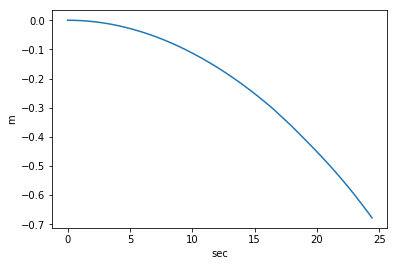

In [16]:
plt.plot(mobile_df["Timestamp"], mobile_df["position_x"])
plt.xlabel("sec")
plt.ylabel("m")

Text(0,0.5,'m')

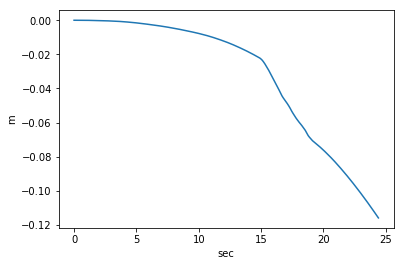

In [17]:
plt.plot(mobile_df["Timestamp"], mobile_df["position_y"])
plt.xlabel("sec")
plt.ylabel("m")

Text(0,0.5,'m')

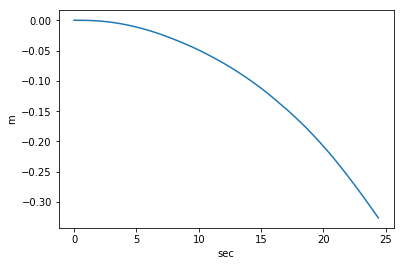

In [18]:
plt.plot(mobile_df["Timestamp"], mobile_df["position_z"])
plt.xlabel("sec")
plt.ylabel("m")

In [45]:
import matplotlib

In [52]:
norm = matplotlib.colors.Normalize(vmin=0, vmax=25)
cmap = plt.cm.rainbow

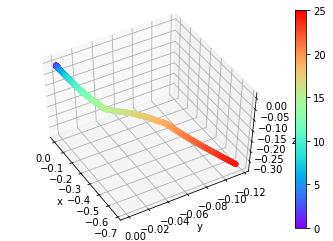

In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mobile_df["position_x"], mobile_df["position_y"], mobile_df["position_z"], c=cmap(norm(mobile_df["Timestamp"].values)))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(50, 150)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm)

plt.savefig('foo.png')